In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("BMW sales data (2010-2024).csv")

df.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


In [4]:
df.shape

(50000, 11)

In [5]:
df.columns

Index(['Model', 'Year', 'Region', 'Color', 'Fuel_Type', 'Transmission',
       'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume',
       'Sales_Classification'],
      dtype='object')

In [6]:
df.describe(include="all")

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
count,50000,50000.000000,50000,50000,50000,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000
unique,11,NaN,6,6,4,2,NaN,NaN,NaN,NaN,2
top,7 Series,NaN,Asia,Red,Hybrid,Manual,NaN,NaN,NaN,NaN,Low
freq,4666,NaN,8454,8463,12716,25154,NaN,NaN,NaN,NaN,34754
mean,NaN,2017.015700,NaN,NaN,NaN,NaN,3.247180,100307.203140,75034.600900,5067.514680,NaN
std,NaN,4.324459,NaN,NaN,NaN,NaN,1.009078,57941.509344,25998.248882,2856.767125,NaN
min,NaN,2010.000000,NaN,NaN,NaN,NaN,1.500000,3.000000,30000.000000,100.000000,NaN
25%,NaN,2013.000000,NaN,NaN,NaN,NaN,2.400000,50178.000000,52434.750000,2588.000000,NaN
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,3.200000,100388.500000,75011.500000,5087.000000,NaN
75%,NaN,2021.000000,NaN,NaN,NaN,NaN,4.100000,150630.250000,97628.250000,7537.250000,NaN


In [7]:
df.isnull().sum()

Model                   0
Year                    0
Region                  0
Color                   0
Fuel_Type               0
Transmission            0
Engine_Size_L           0
Mileage_KM              0
Price_USD               0
Sales_Volume            0
Sales_Classification    0
dtype: int64

In [8]:
df = df.fillna(method="ffill")
df = df.fillna(method="bfill")

C:\Users\hussa\AppData\Local\Temp\ipykernel_11512\4232275779.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method="ffill")
C:\Users\hussa\AppData\Local\Temp\ipykernel_11512\4232275779.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method="bfill")


In [9]:
df.duplicated().sum()

df = df.drop_duplicates()

In [10]:
df.dtypes

Model                    object
Year                      int64
Region                   object
Color                    object
Fuel_Type                object
Transmission             object
Engine_Size_L           float64
Mileage_KM                int64
Price_USD                 int64
Sales_Volume              int64
Sales_Classification     object
dtype: object

In [21]:
df["Year"] = df["Year"].astype(int)

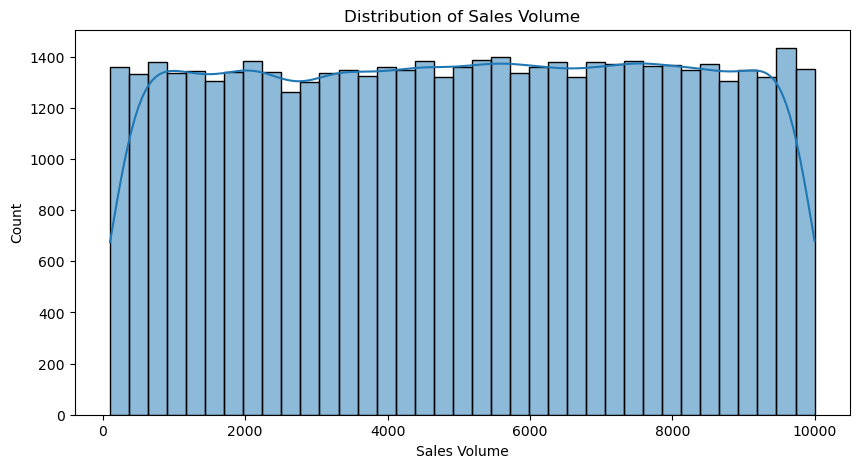

In [22]:
plt.figure(figsize=(10,5))
sns.histplot(df["Sales_Volume"], kde=True)
plt.title("Distribution of Sales Volume")
plt.xlabel("Sales Volume")
plt.show()

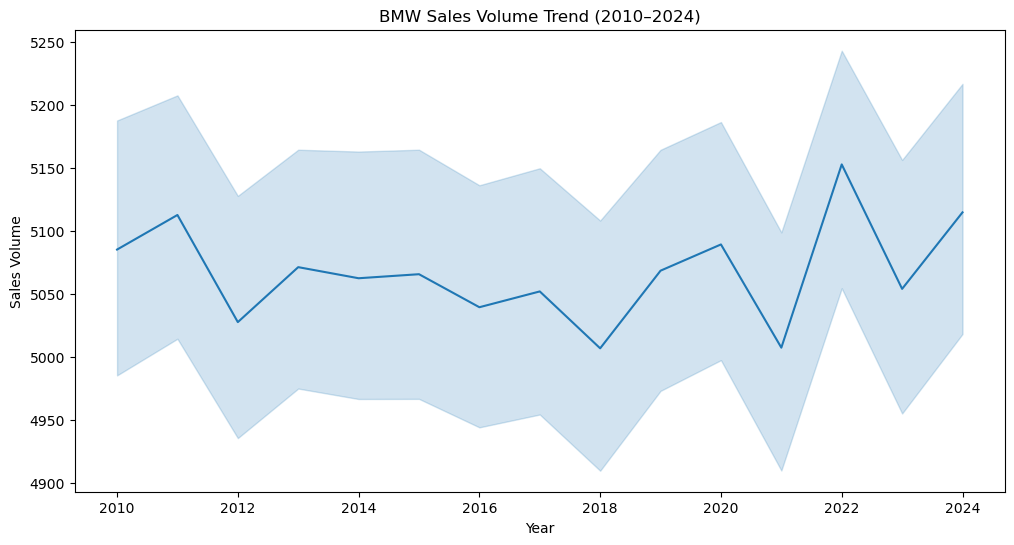

In [23]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df["Year"], y=df["Sales_Volume"])
plt.title("BMW Sales Volume Trend (2010–2024)")
plt.xlabel("Year")
plt.ylabel("Sales Volume")
plt.show()

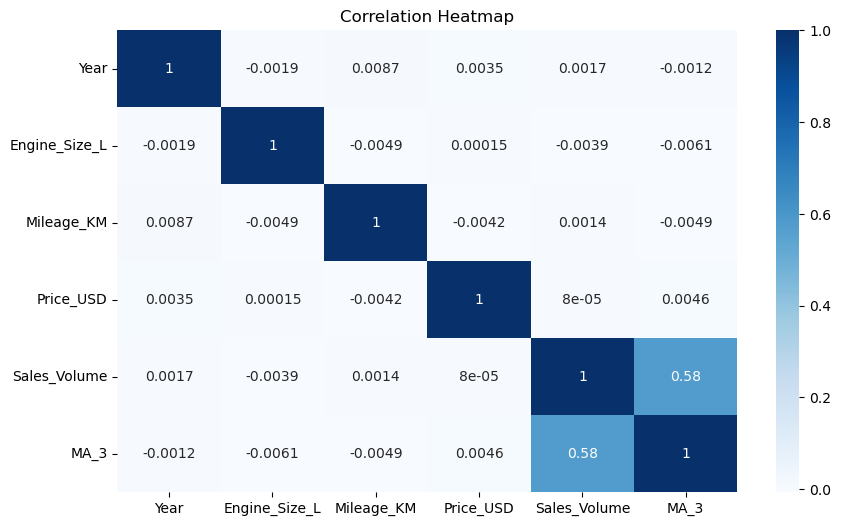

In [46]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()

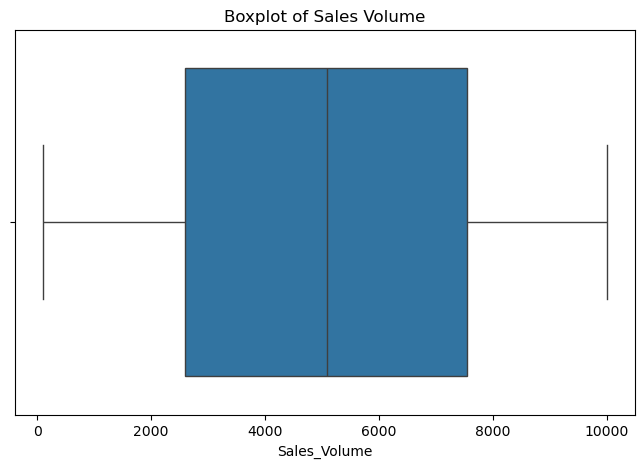

In [47]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df["Sales_Volume"])
plt.title("Boxplot of Sales Volume")
plt.show()

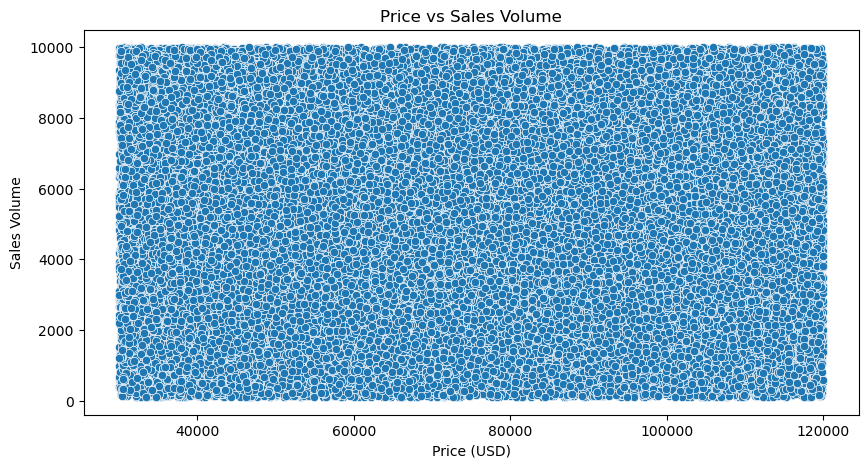

In [48]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df["Price_USD"], y=df["Sales_Volume"])
plt.title("Price vs Sales Volume")
plt.xlabel("Price (USD)")
plt.ylabel("Sales Volume")
plt.show()

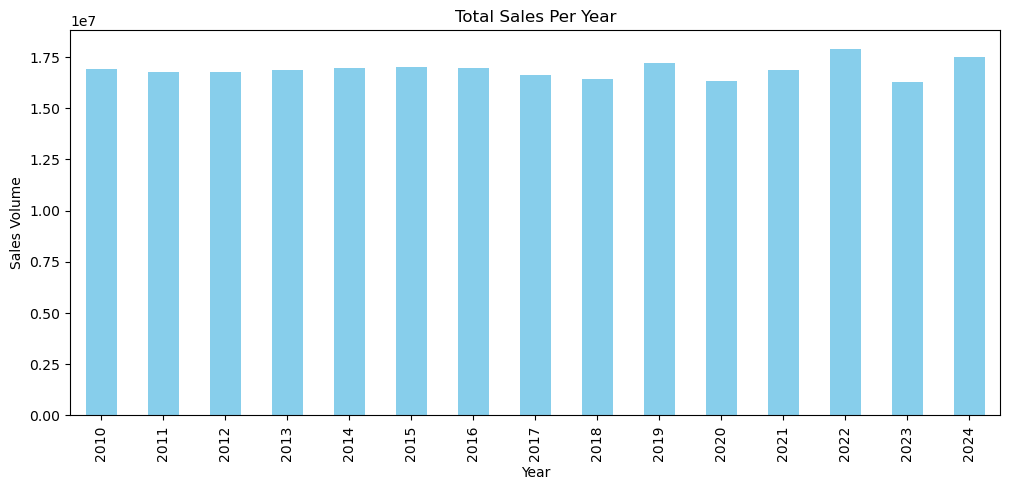

In [49]:
yearly = df.groupby("Year")["Sales_Volume"].sum()

plt.figure(figsize=(12,5))
yearly.plot(kind="bar", color="skyblue")
plt.title("Total Sales Per Year")
plt.xlabel("Year")
plt.ylabel("Sales Volume")
plt.show()

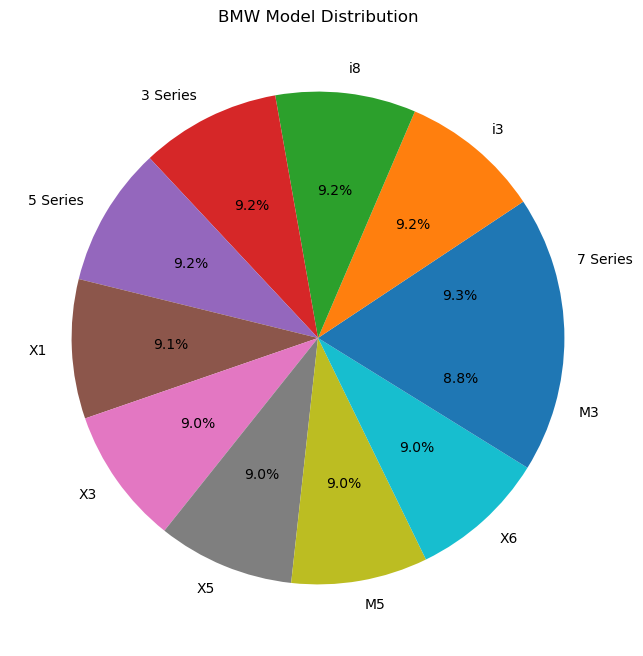

In [50]:
plt.figure(figsize=(8,8))
df["Model"].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("BMW Model Distribution")
plt.ylabel("")
plt.show()

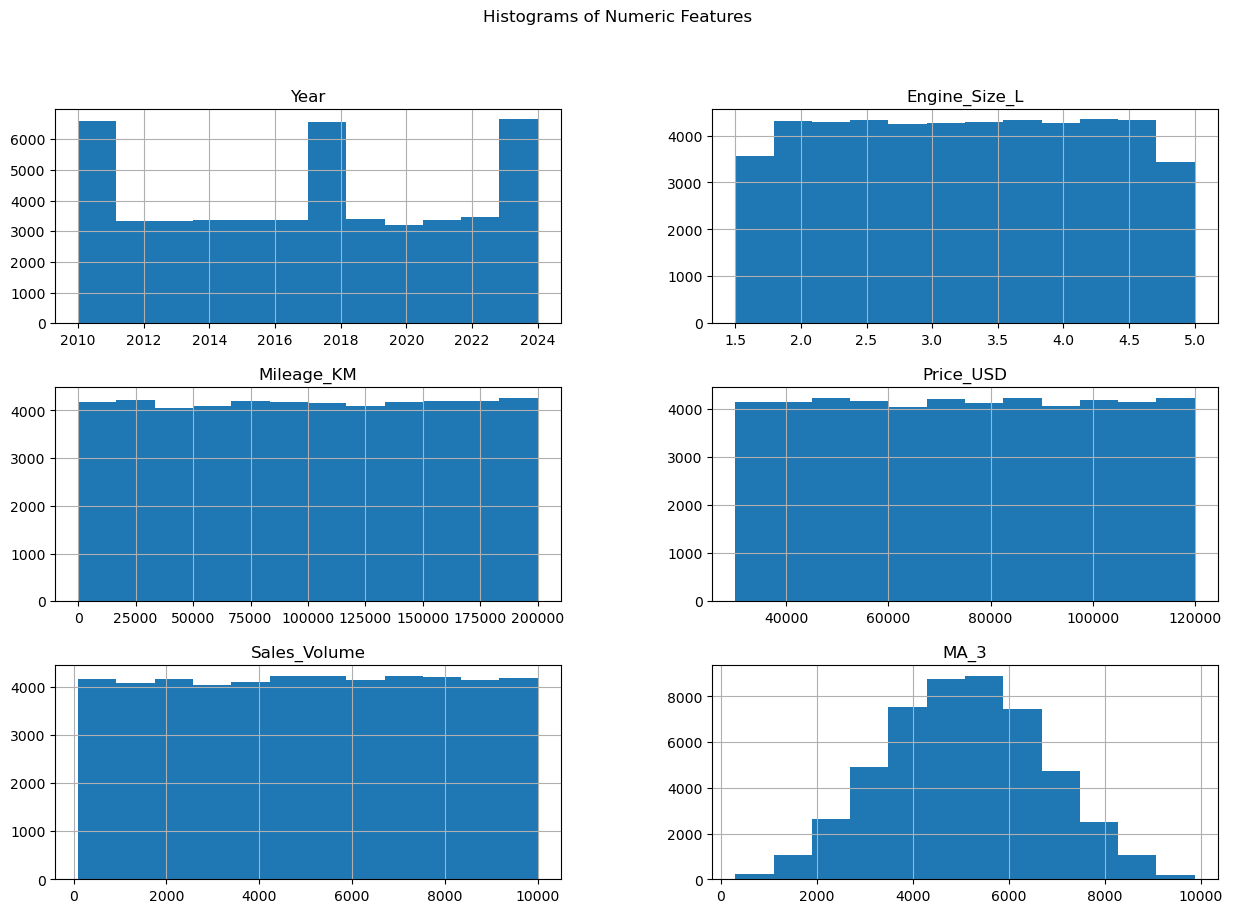

In [54]:
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols].hist(figsize=(15, 10), bins=12)
plt.suptitle("Histograms of Numeric Features")
plt.show()

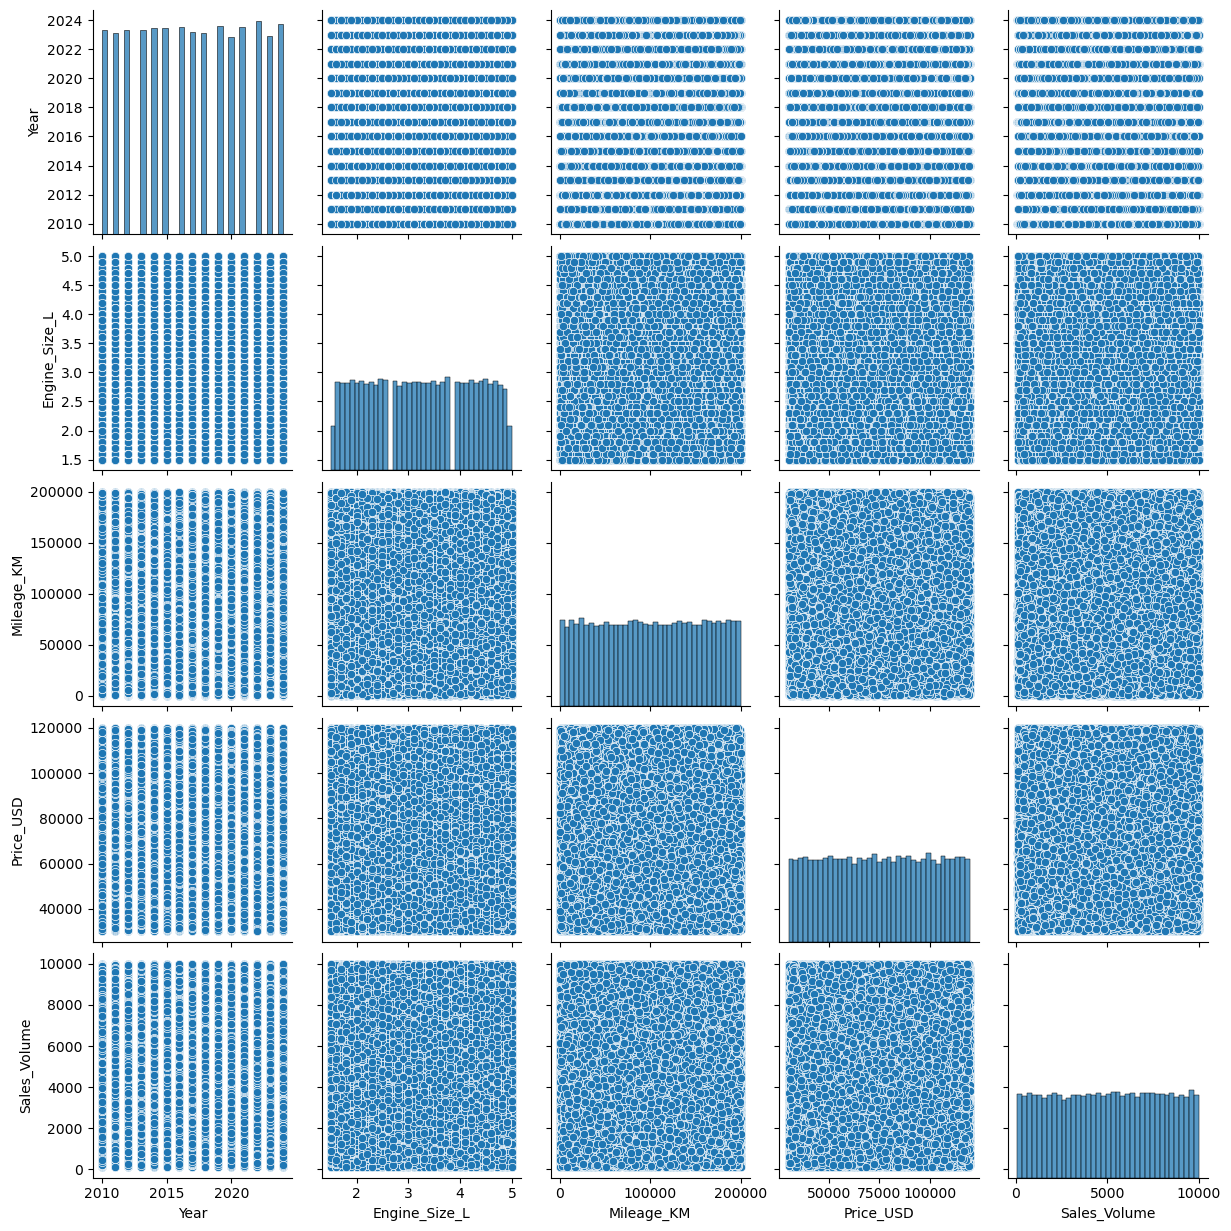

In [51]:
sns.pairplot(df[num_cols])
plt.show()

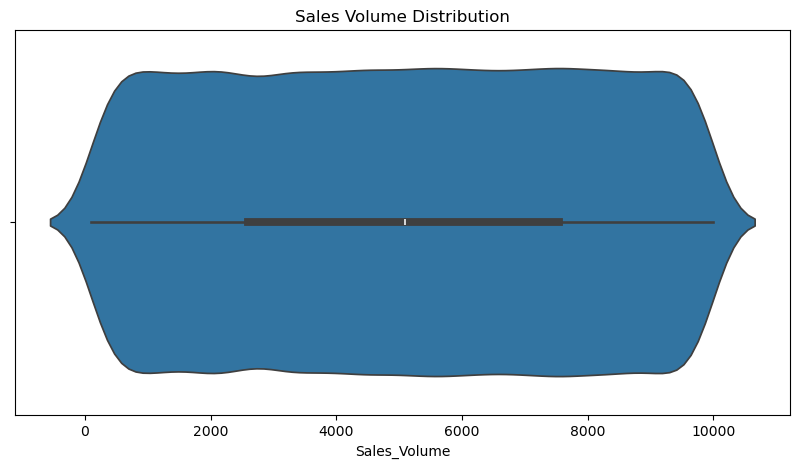

In [52]:
plt.figure(figsize=(10,5))
sns.violinplot(x=df["Sales_Volume"])
plt.title("Sales Volume Distribution")
plt.show()

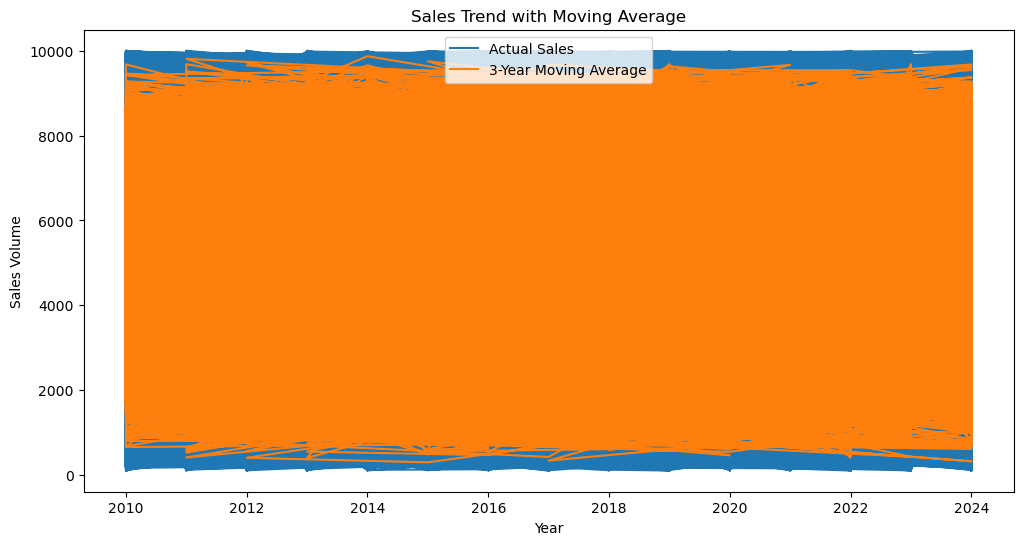

In [53]:
df["MA_3"] = df["Sales_Volume"].rolling(window=3).mean()

plt.figure(figsize=(12,6))
plt.plot(df["Year"], df["Sales_Volume"], label="Actual Sales")
plt.plot(df["Year"], df["MA_3"], label="3-Year Moving Average")
plt.title("Sales Trend with Moving Average")
plt.xlabel("Year")
plt.ylabel("Sales Volume")
plt.legend()
plt.show()

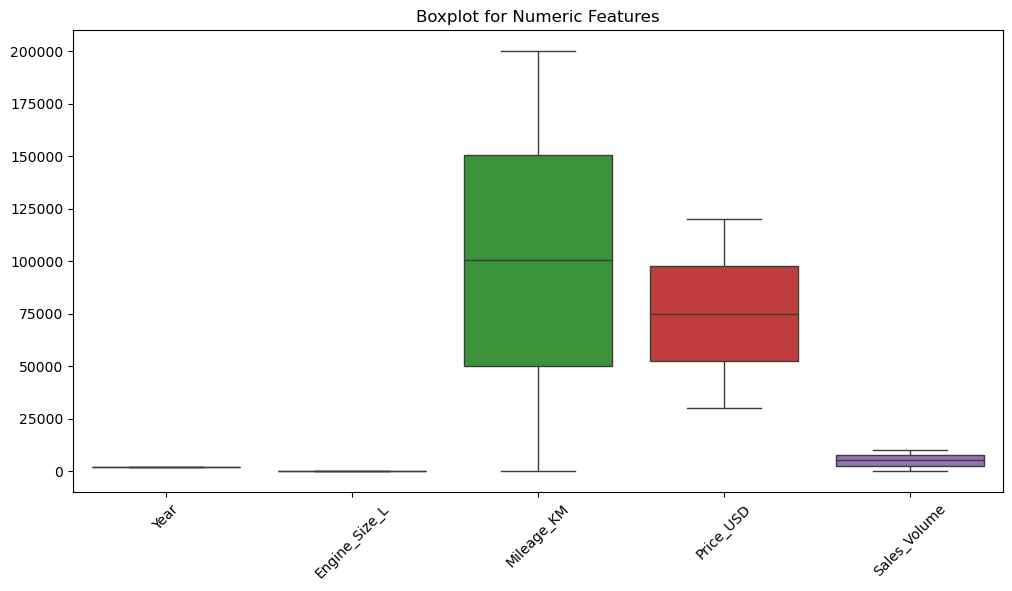

In [45]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[num_cols])
plt.title("Boxplot for Numeric Features")
plt.xticks(rotation=45)
plt.show()

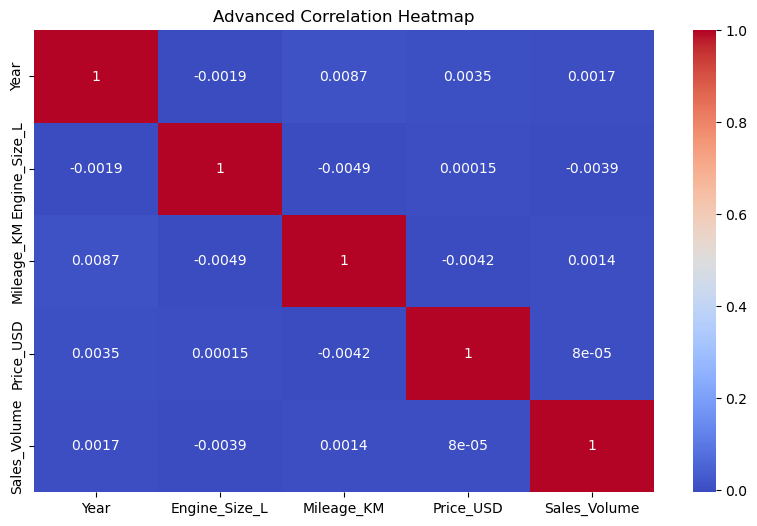

In [44]:
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Advanced Correlation Heatmap")
plt.show()

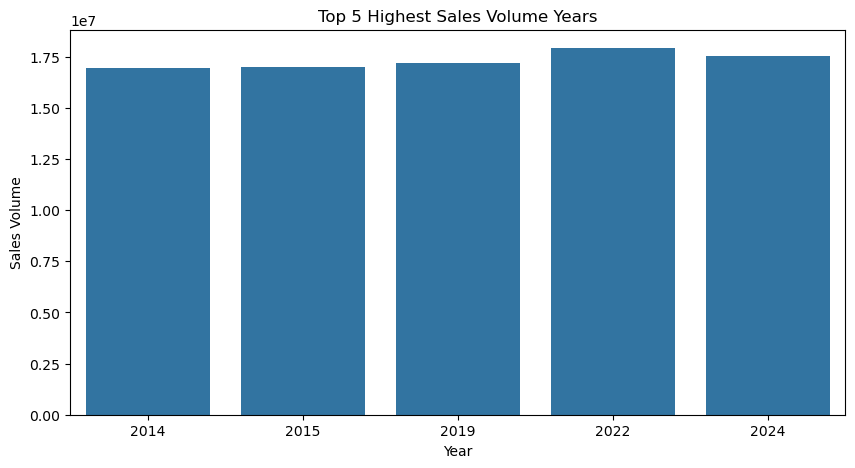

In [43]:
top_years = df.groupby("Year")["Sales_Volume"].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(10,5))
sns.barplot(x=top_years.index, y=top_years.values)
plt.title("Top 5 Highest Sales Volume Years")
plt.xlabel("Year")
plt.ylabel("Sales Volume")
plt.show()

In [42]:
df.to_csv("BMW_cleaned.csv", index=False)
df.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification,MA_3
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High,NaN
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low,NaN
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low,6240.666667
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low,4823.000000
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low,4707.000000
